<a href="https://colab.research.google.com/github/2303A52363/GENERATIVE-AI_B39/blob/main/ASSIGNMENT_11(GEN_AI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ASSIGNMENT-11

HALLTICKET NO : 2303A52363

BATCH : 39

In [ ]:
import zipfile
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adadelta

# Unzip training and validation data
with zipfile.ZipFile("/content/train-20250404T145129Z-001.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/train")

with zipfile.ZipFile("/content/validation-20250404T145130Z-001.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/val")

# Define image generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Setup generators
train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    '/content/val',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

# Build CNN Model (as per Table 1)
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')  # Output layer
])

# Compile model
model.compile(
    optimizer=Adadelta(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# Evaluate accuracy
train_loss, train_acc = model.evaluate(train_generator)
val_loss, val_acc = model.evaluate(val_generator)

print(f"\nTraining Accuracy: {train_acc * 100:.2f}%")
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

Found 4 images belonging to 1 classes.
Found 4 images belonging to 1 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step - accuracy: 1.0000 - loss:

Found 4 images belonging to 1 classes.
Found 4 images belonging to 1 classes.

Training: Original CNN
Epoch 1/10
1/1 - 3s - 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
1/1 - 1s - 842ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
1/1 - 1s - 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
1/1 - 1s - 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
1/1 - 1s - 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
1/1 - 1s - 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
1/1 - 1s - 776ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
1/1 - 1s - 846ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 

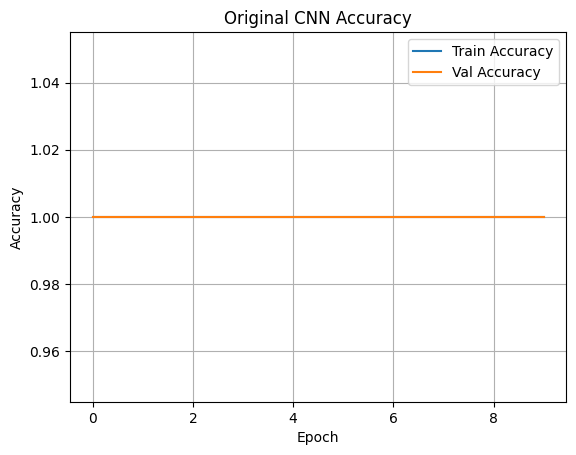

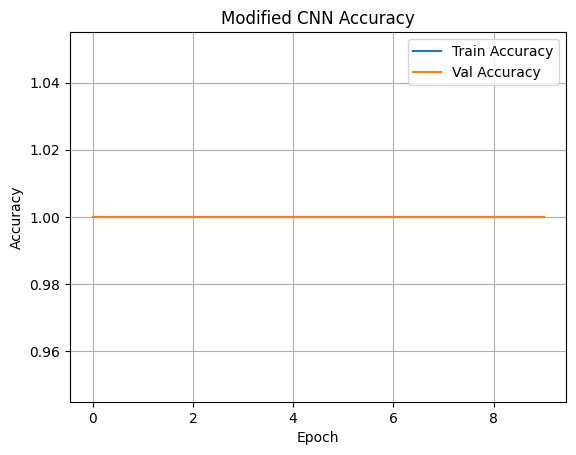

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adadelta
import matplotlib.pyplot as plt

# =======================
# Set paths to your dataset
# =======================
train_dir = 'train'  # <-- replace with your path
val_dir = 'val'      # <-- replace with your path

# =======================
# Image size and training parameters
# =======================
img_size = (128, 128)
batch_size = 32
epochs = 10

# =======================
# Load & preprocess the data
# =======================
train_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1.0/255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# =======================
# Build original model from Tabela 1
# =======================
def build_original_model():
    model = Sequential([
        Conv2D(64, (3,3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
        MaxPooling2D((2,2)),

        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D((2,2)),

        Conv2D(256, (3,3), activation='relu'),
        MaxPooling2D((2,2)),

        Flatten(),
        Dense(256, activation='relu'),
        Dense(train_data.num_classes, activation='softmax')
    ])
    return model

# =======================
# Build modified model (with Dropout for better generalization)
# =======================
def build_modified_model():
    model = Sequential([
        Conv2D(64, (3,3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
        MaxPooling2D((2,2)),
        Dropout(0.25),

        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Dropout(0.25),

        Conv2D(256, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Dropout(0.25),

        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(train_data.num_classes, activation='softmax')
    ])
    return model

# =======================
# Compile, Train, and Evaluate a model
# =======================
def train_and_evaluate(model, model_name):
    print(f"\nTraining: {model_name}")
    model.compile(optimizer=Adadelta(), loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(
        train_data,
        epochs=epochs,
        validation_data=val_data,
        verbose=2
    )

    train_loss, train_acc = model.evaluate(train_data)
    val_loss, val_acc = model.evaluate(val_data)

    print(f"{model_name} - Training Accuracy: {train_acc:.4f}")
    print(f"{model_name} - Validation Accuracy: {val_acc:.4f}")

    return model, history, train_acc, val_acc

# =======================
# Train both models
# =======================
original_model, history1, train_acc1, val_acc1 = train_and_evaluate(build_original_model(), "Original CNN")
modified_model, history2, train_acc2, val_acc2 = train_and_evaluate(build_modified_model(), "Modified CNN with Dropout")

# =======================
# Choose Best Model
# =======================
if val_acc1 > val_acc2:
    best_model = original_model
    best_name = "Original CNN"
    best_val = val_acc1
else:
    best_model = modified_model
    best_name = "Modified CNN with Dropout"
    best_val = val_acc2

print(f"\n✅ Best performing model: {best_name} with Validation Accuracy: {best_val:.4f}")

# =======================
# Plot Accuracy Curves
# =======================
def plot_history(history, title):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history(history1, "Original CNN Accuracy")
plot_history(history2, "Modified CNN Accuracy")
